# An√°lisis de `PR_Advisory_Tweets_Feb_2025.csv`

Este cuaderno presenta un an√°lisis estructurado de los datos de Twitter relacionados con la alerta de tsunami de Puerto Rico en febrero de 2025. Incluye:

- **Carga y preprocesamiento de datos**.
- **An√°lisis de datos e ingenier√≠a de caracter√≠sticas**.
- **An√°lisis exploratorio de datos (EDA)**
- **Visualizaciones** utilizando bibliotecas como Pandas, Matplotlib, Seaborn, Plotly, PyWaffle y WordCloud.

El objetivo es extraer informaci√≥n significativa del contenido de los tweets y de los patrones de participaci√≥n, prestando atenci√≥n al uso del lenguaje, las tendencias temporales y las caracter√≠sticas textuales. Este cuaderno sirve tanto de informe anal√≠tico como de referencia para aplicar diversas herramientas de Python al an√°lisis de las redes sociales.

## 1. Importar bibliotecas

Las siguientes bibliotecas se utilizar√°n a lo largo del cuaderno.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pywaffle import Waffle
from wordcloud import WordCloud



## 2. Carga de datos

Cargar CSV en un DataFrame de Pandas.

In [2]:
# Cargar CSV con cabecera deducida
df = pd.read_csv('PR_Advisory_Tweets_Feb_2025.csv')

print("Datos cargados. N√∫mero de filas:", df.shape[0])
df.head()

Datos cargados. N√∫mero de filas: 122


Query_Str  \
0  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
1  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
2  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
3  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
4  Puerto Rico (tsunami OR sismo OR terremoto OR ...   

                                            Post_URL           Author_Name  \
0  https://x.com/search?q=Puerto Rico (tsunami OR...          sia ‚ùÑÔ∏è | fan   
1  https://x.com/search?q=Puerto Rico (tsunami OR...  Ge√≥l. Sergio Almaz√°n   
2  https://x.com/search?q=Puerto Rico (tsunami OR...            Jack Straw   
3  https://x.com/search?q=Puerto Rico (tsunami OR...    Belen Larchens üíõüêæüêæ   
4  https://x.com/search?q=Puerto Rico (tsunami OR...              SkyAlert   

             Author_Web_Page_URL    Author_Handle  Verified_Status  \
0    https://x.com/lalisalovemme    lalisalovemme             True   
1      https://x.com/chematierra      chematierra             True   
2  https://x.com/JackStr42679640  JackStr42679640             True   
3    https://x.com/belenlarchens    belenlarchens            False   
4       https://x.com/SkyAlertMx       SkyAlertMx             True   

                    UTC_Time    Ads  \
0  2025-02-07 00:08:19+00:00  False   
1  2025-02-07 14:07:39+00:00  False   
2  2025-02-07 11:43:05+00:00  False   
3  2025-02-07 23:07:14+00:00  False   
4  2025-02-07 02:43:14+00:00  False   

                                       Tweet_Content       Post_ID  ...  \
0  THIS IS A 9.9 MAGNITUDE MOTHERSQUAKE!!!!\n\n#D...  1.887655e+18  ...   
1  AVISO üî¥\nEnjambre s√≠smico intenso cercano a #S...  1.887866e+18  ...   
2  üö®Guantanamo Bay Alert! (Watch till end)üö®\n¬†\nT...  1.887829e+18  ...   
3  El municipio de #ElBols√≥n inform√≥ : ¬´se ordena...  1.888002e+18  ...   
4  #Sismo magnitud 4.0 (SSN) ubicado a 14 km al s...  1.887694e+18  ...   

  Like_Count  View_Count  Bookmark_Count  \
0       4621       60693              66   
1        221        8646               5   
2        427       15428              46   
3        467        9041               4   
4        229       15918               1   

                                     Tweet_Image_URL  Replying_to  \
0  https://pbs.twimg.com/ext_tw_video_thumb/18876...        False   
1    https://pbs.twimg.com/media/GjML8z7WEAAeZgK.jpg        False   
2  https://pbs.twimg.com/ext_tw_video_thumb/18878...        False   
3    https://pbs.twimg.com/media/GjOHcENXoAAlZnc.jpg        False   
4  https://pbs.twimg.com/media/GjJvTPaXwAAxZCN.jp...        False   

   Reply_to_Whom Reply_to_Whom_URL  Reply_to_Whom_Username  \
0            NaN               NaN                     NaN   
1            NaN               NaN                     NaN   
2            NaN               NaN                     NaN   
3            NaN               NaN                     NaN   
4            NaN               NaN                     NaN   

  Reply_to_Whom_Handle Language  
0                  NaN       en  
1                  NaN       es  
2                  NaN       en  
3                  NaN       es  
4                  NaN       es  

[5 rows x 23 columns]

## 3. Exploraci√≥n r√°pida

Inspeccionemos r√°pidamente los datos.

In [3]:
# Ver las primeras y √∫ltimas filas
print(df.head())
print(df.tail())

# Informaci√≥n resumida
df.info()
print(df.describe(include='all'))

# Comprobar si hay valores nulos
print(df.isnull().sum())

# Tipos de datos
print(df.dtypes)

                                           Query_Str  \
0  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
1  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
2  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
3  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
4  Puerto Rico (tsunami OR sismo OR terremoto OR ...   

                                            Post_URL           Author_Name  \
0  https://x.com/search?q=Puerto Rico (tsunami OR...          sia ‚ùÑÔ∏è | fan   
1  https://x.com/search?q=Puerto Rico (tsunami OR...  Ge√≥l. Sergio Almaz√°n   
2  https://x.com/search?q=Puerto Rico (tsunami OR...            Jack Straw   
3  https://x.com/search?q=Puerto Rico (tsunami OR...    Belen Larchens üíõüêæüêæ   
4  https://x.com/search?q=Puerto Rico (tsunami OR...              SkyAlert   

             Author_Web_Page_URL    Author_Handle  Verified_Status  \
0    https://x.com/lalisalovemme    lalisalovemme             True   
1      https://x.com/chematierra      c

## 4. Limpieza de datos e ingenier√≠a de caracter√≠sticas

El conjunto de datos se preproces√≥ para conservar s√≥lo los atributos m√°s relevantes para el an√°lisis. Se realizaron los siguientes pasos:

- Se eliminaron las columnas que s√≥lo conten√≠an valores perdidos.
- Se eliminaron los metadatos y los campos auxiliares no necesarios para el an√°lisis, incluida la informaci√≥n sobre el autor, las URL de las im√°genes y los objetivos de las respuestas.
- Se rellenaron los valores que faltaban en los campos relacionados con el compromiso (`Reply_Count`, `Repost_Count`, `Like_Count`, `Bookmark_Count`) y se convirtieron a tipo entero.
- Creamos una columna `Total_Engagement` sumando las m√©tricas de compromiso individuales.
- Seleccionamos las caracter√≠sticas clave para el an√°lisis: `Post_ID`, `Tweet_Content`, `Total_Engagement`, y `Language`.
- Se ha a√±adido una columna `Tweet_Length` para capturar el n√∫mero de caracteres de cada tweet.

El resultado es un DataFrame simplificado adecuado para el an√°lisis basado en el contenido, la participaci√≥n y el idioma.



In [5]:
# Paso 1: Eliminar columnas que tienen solo valores nulos
df = pd.read_csv("PR_Advisory_Tweets_Feb_2025.csv")
df = df.dropna(axis=1, how='all')

# Paso 2: Eliminar columnas de metadatos innecesarias
drop_cols = [
    'Query_Str', 'Post_URL', 'Author_Name', 'Author_Web_Page_URL', 'Author_Handle',
    'Verified_Status', 'Tweet_URL', 'Tweet_Image_URL',
    'Replying_to', 'Reply_to_Whom', 'Reply_to_Whom_URL',
    'Reply_to_Whom_Username', 'Reply_to_Whom_Handle', 'Ads'
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Paso 3: Rellenar y convertir las columnas de engagement
engagement_cols = ["Reply_Count", "Repost_Count", "Like_Count", "Bookmark_Count"]
for col in engagement_cols:
    df[col] = df[col].fillna(0).astype(int)

# Paso 4: Crear la columna Total_Engagement (suma de todas las interacciones)
df["Total_Engagement"] = df["Reply_Count"] + df["Repost_Count"] + df["Like_Count"] + df["Bookmark_Count"]

# Paso 5: Renombrar y convertir la columna de tiempo UTC para an√°lisis temporal
df["Timestamp_UTC"] = pd.to_datetime(df["UTC_Time"])

# Paso 6: Seleccionar las columnas relevantes
df_selected = df[["Post_ID", "Tweet_Content", "Total_Engagement", "Language", "Timestamp_UTC"]].copy()

# Paso 7: Agregar columna de longitud del tweet
df_selected["Tweet_Length"] = df_selected["Tweet_Content"].str.len()

# Paso 8: Agregar columnas temporales para futuros an√°lisis
df_selected["Hour"] = df_selected["Timestamp_UTC"].dt.hour
df_selected["Weekday"] = df_selected["Timestamp_UTC"].dt.day_name()
df_selected["Date"] = df_selected["Timestamp_UTC"].dt.date

# Paso 9: Agregar columna categ√≥rica de longitud del tweet usando intervalos
# Definir los rangos de longitud y etiquetas
length_bins = [0, 80, 140, 200, 280, df_selected["Tweet_Length"].max()]
length_labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

# Crear nueva columna categ√≥rica basada en la longitud del tweet
df_selected["Tweet_Length_Category"] = pd.cut(
    df_selected["Tweet_Length"],
    bins=length_bins,
    labels=length_labels,
    include_lowest=True
)

# Vista previa del DataFrame ya limpio
print("DataFrame limpio y transformado:")
df_selected.head()


DataFrame limpio y transformado:


Post_ID                                      Tweet_Content  \
0  1.887655e+18  THIS IS A 9.9 MAGNITUDE MOTHERSQUAKE!!!!\n\n#D...   
1  1.887866e+18  AVISO üî¥\nEnjambre s√≠smico intenso cercano a #S...   
2  1.887829e+18  üö®Guantanamo Bay Alert! (Watch till end)üö®\n¬†\nT...   
3  1.888002e+18  El municipio de #ElBols√≥n inform√≥ : ¬´se ordena...   
4  1.887694e+18  #Sismo magnitud 4.0 (SSN) ubicado a 14 km al s...   

   Total_Engagement Language             Timestamp_UTC  Tweet_Length  Hour  \
0              6214       en 2025-02-07 00:08:19+00:00            97     0   
1               319       es 2025-02-07 14:07:39+00:00           303    14   
2               657       en 2025-02-07 11:43:05+00:00           302    11   
3              1023       es 2025-02-07 23:07:14+00:00           300    23   
4               255       es 2025-02-07 02:43:14+00:00           167     2   

  Weekday        Date Tweet_Length_Category  
0  Friday  2025-02-07                 Short  
1  Friday  2025-02-07             Very Long  
2  Friday  2025-02-07             Very Long  
3  Friday  2025-02-07             Very Long  
4  Friday  2025-02-07                Medium

## 5. An√°lisis y exploraci√≥n de datos

### üü¶ SECCI√ìN A: An√°lisis de la distribuci√≥n

Estos gr√°ficos muestran la forma y la distribuci√≥n de las dos caracter√≠sticas num√©ricas principales:
- **Total_Engagement:** Cu√°nta atenci√≥n recibieron los tweets.
- **Longitud_Tweet:** N√∫mero de caracteres de cada tweet.
- **Language:** Espa√±ol o ingl√©s

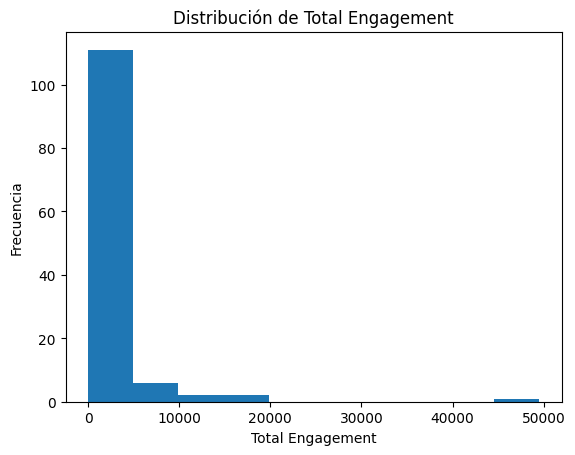

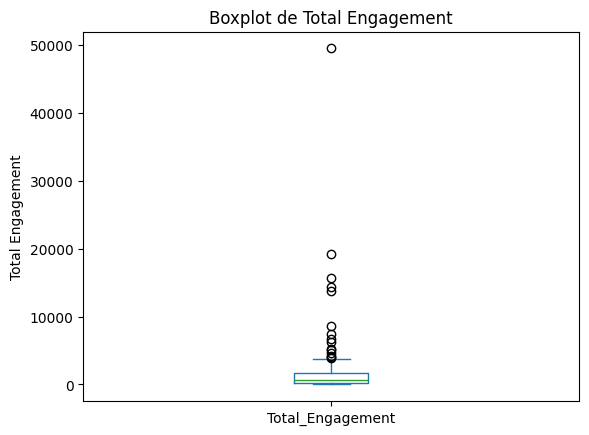

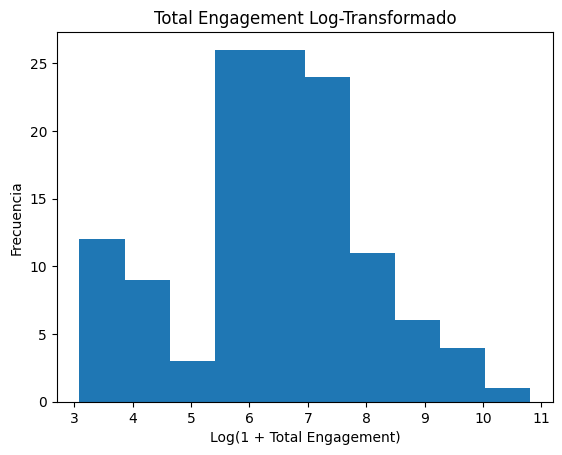

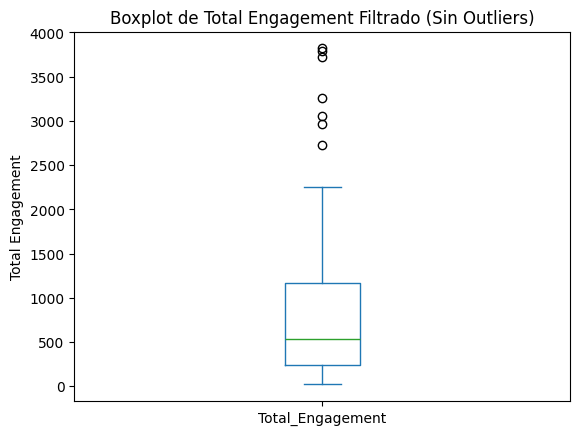

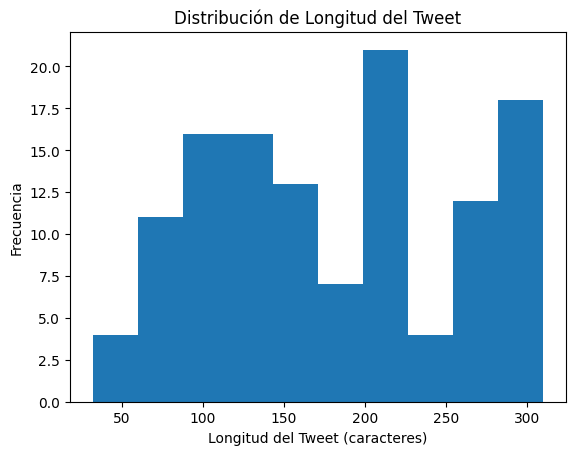

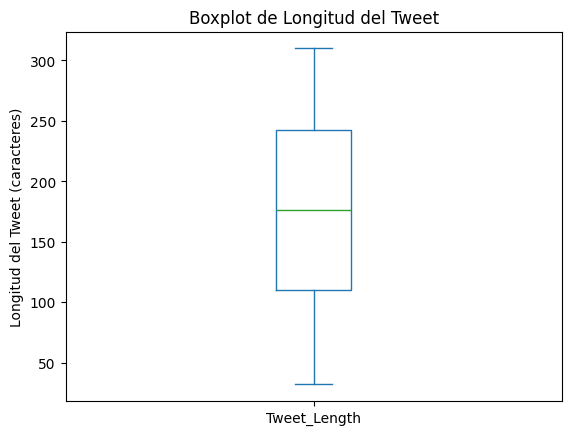

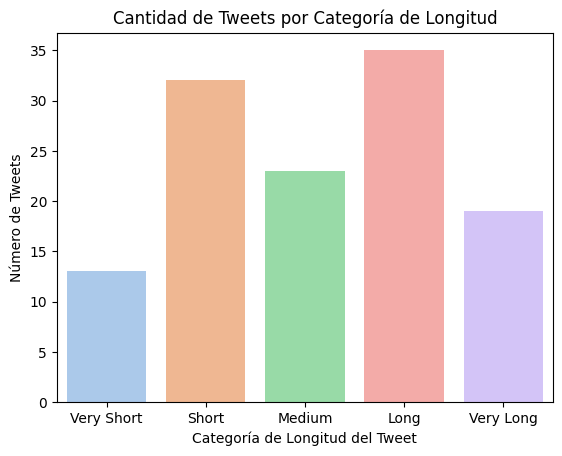

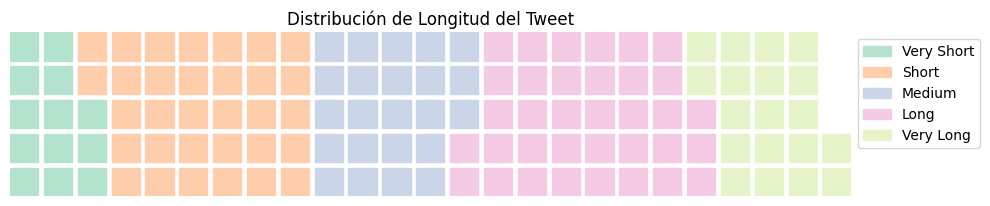

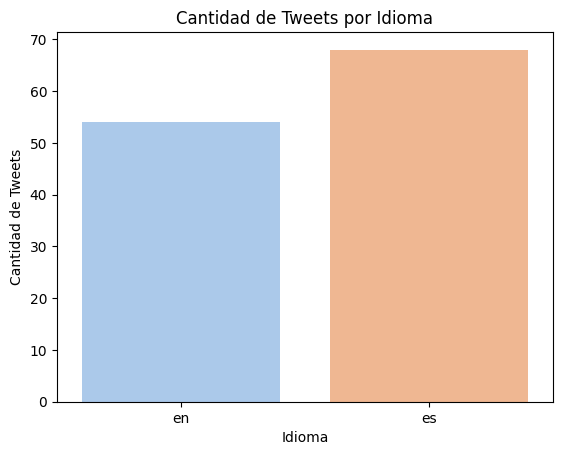

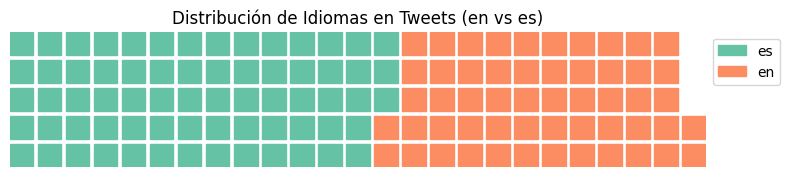

In [6]:
# ======================================================
# SECCI√ìN A: DISTRIBUCI√ìN DE TOTAL ENGAGEMENT E INSIGHTS
# ======================================================

# Histograma: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="hist", bins=10, title="Distribuci√≥n de Total Engagement")
plt.xlabel("Total Engagement")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement")
plt.ylabel("Total Engagement")
plt.show()

# Transformaci√≥n logar√≠tmica de Total Engagement para mejor escala
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected["Log_Total_Engagement"].plot(kind="hist", bins=10, title="Total Engagement Log-Transformado")
plt.xlabel("Log(1 + Total Engagement)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement filtrado por IQR (eliminando outliers extremos)
Q1 = df_selected["Total_Engagement"].quantile(0.25)
Q3 = df_selected["Total_Engagement"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_selected[
    (df_selected["Total_Engagement"] >= Q1 - 1.5 * IQR) &
    (df_selected["Total_Engagement"] <= Q3 + 1.5 * IQR)
]

filtered_df["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement Filtrado (Sin Outliers)")
plt.ylabel("Total Engagement")
plt.show()


# ======================================================
# SECCI√ìN B: DISTRIBUCI√ìN Y CATEGORIZACI√ìN DE LONGITUD DE TWEETS
# ======================================================

# Histograma: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="hist", bins=10, title="Distribuci√≥n de Longitud del Tweet")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="box", title="Boxplot de Longitud del Tweet")
plt.ylabel("Longitud del Tweet (caracteres)")
plt.show()

# Gr√°fico de barras: N√∫mero de tweets por categor√≠a de longitud
sns.countplot(
    x="Tweet_Length_Category",
    hue="Tweet_Length_Category",  # mismo valor que x para aplicar bien la paleta
    data=df_selected,
    order=["Very Short", "Short", "Medium", "Long", "Very Long"],
    palette="pastel",
    legend=False
)
plt.title("Cantidad de Tweets por Categor√≠a de Longitud")
plt.xlabel("Categor√≠a de Longitud del Tweet")
plt.ylabel("N√∫mero de Tweets")
plt.show()

# Gr√°fico tipo waffle: Distribuci√≥n por categor√≠a de longitud
length_counts = df_selected["Tweet_Length_Category"].value_counts().sort_index().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=length_counts,
    figsize=(10, 4),
    title={"label": "Distribuci√≥n de Longitud del Tweet", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9"],
    block_arranging_style='snake',
)
plt.show()


# ======================================================
# SECCI√ìN C: DISTRIBUCI√ìN DE IDIOMAS
# ======================================================

# Gr√°fico de barras: Tweets por idioma
if "Language" in df_selected.columns:
    sns.countplot(
        x="Language",
        hue="Language",
        data=df_selected,
        palette="pastel",
        legend=False
    )
    plt.title("Cantidad de Tweets por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Cantidad de Tweets")
    plt.show()

# Gr√°fico tipo waffle: Distribuci√≥n de idiomas
language_counts = df_selected["Language"].value_counts().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=language_counts,
    figsize=(8, 4),
    title={"label": "Distribuci√≥n de Idiomas en Tweets (en vs es)", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#66c2a5", "#fc8d62"],
    block_arranging_style='snake',
)
plt.show()


## üìä Distribuci√≥n del Total de Engagement

#### üîπ Histograma Bruto
- La distribuci√≥n de `Total_Engagement` est√° **fuertemente sesgada hacia la derecha**.
- La mayor√≠a de los tweets tienen bajo engagement, mientras que unos pocos superan los **10,000 o incluso 50,000**, actuando como valores at√≠picos extremos.

#### üîπ Boxplot Bruto
- La mayor√≠a de los tweets est√°n concentrados por debajo de **1,000** de engagement.
- Hay una clara presencia de **valores at√≠picos extremos** de hasta 50K que distorsionan la escala.

#### üîπ Histograma Transformado (Log)
- Aplicar una transformaci√≥n logar√≠tmica (`log(1 + x)`) produce una distribuci√≥n **m√°s normalizada y con forma de campana**.
- Ayuda a revelar patrones ocultos en la larga cola de tweets con poco engagement.

#### üîπ Boxplot Filtrado (Sin Outliers)
- Tras aplicar un filtro usando el IQR, el boxplot se vuelve **mucho m√°s legible**.
- Los tweets t√≠picos oscilan entre **200 y 2,200** de engagement.
- Esto revela una **distribuci√≥n central m√°s interpretable**.

‚úÖ **An√°lisis**: Para un an√°lisis m√°s claro, `Total_Engagement` requiere una transformaci√≥n o filtrado de outliers. La mayor√≠a de los tweets tienen poco engagement, pero unos pocos dominan la distribuci√≥n.

---

## üìù Distribuci√≥n de la Longitud de los Tweets

#### üîπ Histograma y Boxplot
- Las longitudes de los tweets var√≠an entre **30 y 310 caracteres**.
- Presentan una distribuci√≥n **casi uniforme**, con ligeros picos hacia las longitudes m√°s altas.
- El tweet mediano tiene alrededor de **180‚Äì200 caracteres**.

#### üîπ Categor√≠as de Longitud (Conteo + Waffle)
- Los tweets **Cortos** y **Largos** son los m√°s frecuentes.
- Los tweets **Muy Cortos** y **Muy Largos** son menos comunes.
- El **Gr√°fico de Waffle** y el **Gr√°fico de Barras** refuerzan visualmente este patr√≥n.

‚úÖ **An√°lisis**: La longitud de los tweets est√° relativamente balanceada, con una inclinaci√≥n hacia mensajes de media a larga extensi√≥n, posiblemente para comunicar informaci√≥n completa o instrucciones.

---

## üåê Distribuci√≥n de Idiomas

#### üîπ Gr√°fico de Barras y Waffle
- Los tweets en espa√±ol (`es`) son **m√°s comunes** que los tweets en ingl√©s (`en`) en este conjunto de datos.
- La divisi√≥n por idioma es **consistente en todas las visualizaciones**, lo que sugiere un mayor alcance o nivel de engagement en espa√±ol durante este evento de tipo informativo.

‚úÖ **An√°lisis**: El idioma juega un papel clave en los patrones de comunicaci√≥n. El espa√±ol domina este dataset, lo que indica una estrategia de difusi√≥n localizada o enfocada al p√∫blico hispanohablante.

### üü¶ SECCI√ìN B: Tendencias temporales

Estos gr√°ficos muestran c√≥mo evolucionan el `Total_Engagement` y la `Tweet_Length` a lo largo del tiempo utilizando la fecha y hora reales de publicaci√≥n (`Timestamp_UTC`).

- El gr√°fico de l√≠neas del compromiso a lo largo del tiempo ayuda a identificar los picos de atenci√≥n e interacci√≥n del p√∫blico.
- El gr√°fico de l√≠neas de la longitud de los tweets a lo largo del tiempo muestra los cambios en la composici√≥n de los tweets, por ejemplo si los usuarios se vuelven m√°s expresivos o concisos.

Esta visi√≥n temporal proporciona informaci√≥n sobre el comportamiento de los usuarios y las pautas de participaci√≥n a medida que se desarrollan los acontecimientos.

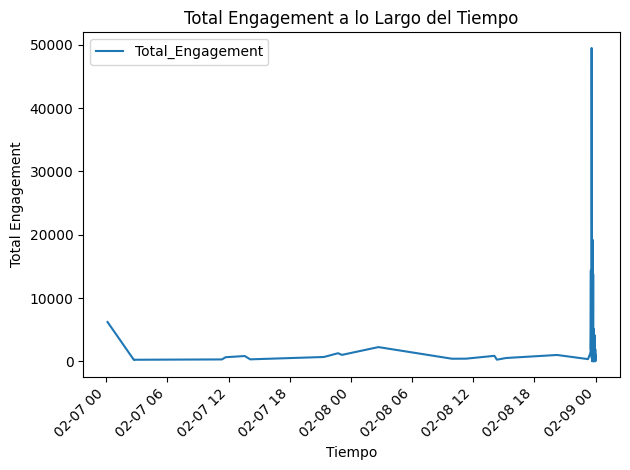

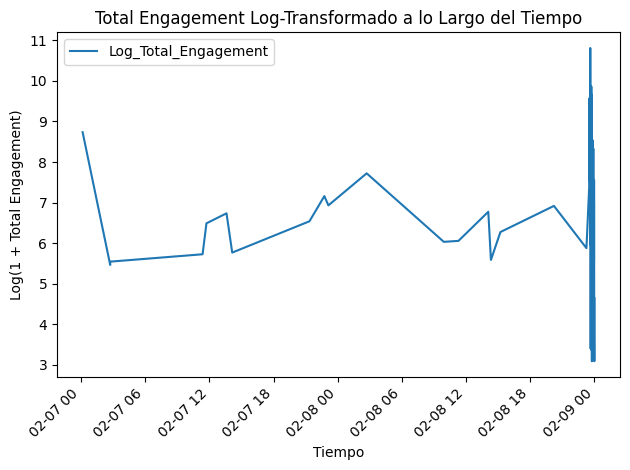

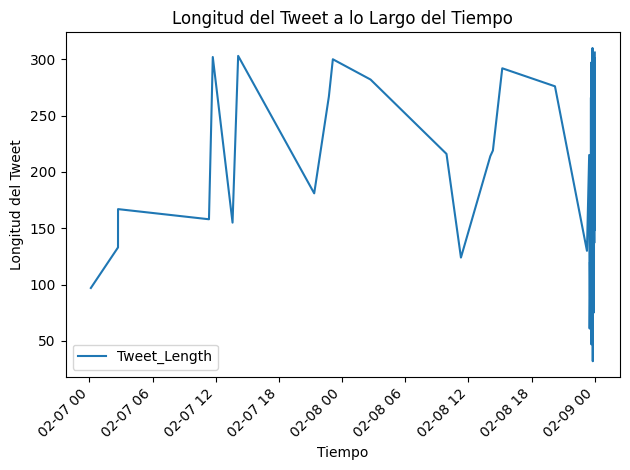

In [7]:
# -------------------------------------------
# SECCI√ìN B: TENDENCIAS TEMPORALES
# -------------------------------------------

# Gr√°fico de l√≠nea: Total Engagement a lo largo del tiempo (valores brutos)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Total_Engagement", kind="line",
    title="Total Engagement a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gr√°fico de l√≠nea: Total Engagement log-transformado a lo largo del tiempo
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Log_Total_Engagement", kind="line",
    title="Total Engagement Log-Transformado a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Log(1 + Total Engagement)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gr√°fico de l√≠nea: Longitud del Tweet a lo largo del tiempo
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Tweet_Length", kind="line",
    title="Longitud del Tweet a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Longitud del Tweet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### üìà **Tendencias Temporales**

#### üîπ **Total Engagement a lo Largo del Tiempo (Bruto)**
- La l√≠nea de tiempo del engagement revela un **pico dram√°tico el 9 de febrero**, correspondiente al **aviso de terremoto/tsunami** ‚Äî una se√±al clara de **alta atenci√≥n p√∫blica**.
- Una publicaci√≥n alcanza casi **50,000 interacciones**, lo que indica un **aviso viral o una actualizaci√≥n cr√≠tica** durante el evento.
- Fuera de este pico, el engagement es generalmente moderado, con **algunos picos menores ocasionales**.

#### üîπ **Total Engagement a lo Largo del Tiempo (Transformaci√≥n Logar√≠tmica)**
- La transformaci√≥n logar√≠tmica suaviza la escala, ofreciendo una vista m√°s clara de **patrones de engagement consistentes** m√°s all√° del pico del 9 de febrero.
- El pico del 9 de febrero sigue destacando como una anomal√≠a clara, pero el resto de la actividad se vuelve m√°s visible, mostrando un **ritmo base** de engagement informativo.
- Este formato permite detectar **cambios de tendencia** sin que un momento viral eclipse el panorama general.

#### üîπ **Longitud de Tweets a lo Largo del Tiempo**
- Alrededor del 9 de febrero, se observa un **conjunto notable de tweets largos**, muchos alcanzando el **l√≠mite de caracteres (280‚Äì310)**.
- Esto sugiere que tanto usuarios como agencias compartieron **actualizaciones detalladas o avisos de emergencia** durante ese periodo cr√≠tico.
- Tambi√©n hay tweets m√°s cortos entremezclados, probablemente utilizados como **alertas breves o seguimientos**.

---

#### ‚úÖ **An√°lisis**
> El 9 de febrero destaca como el **epicentro del engagement p√∫blico**, activado por el aviso de terremoto/tsunami. Los picos virales, la longitud de los tweets y la actividad elevada se alinean con la l√≠nea de tiempo del evento. El **engagement transformado logar√≠tmicamente** ayuda a contextualizar este momento dentro del patr√≥n general de comunicaci√≥n, ofreciendo una visi√≥n sobre c√≥mo evolucionaron la urgencia y el formato del mensaje en tiempo real.

### üü¶ SECCI√ìN C: Comparaciones Basadas en el Idioma

Comparamos el comportamiento de los tweets seg√∫n el idioma:

- **Gr√°fico de Conteo**: Muestra cu√°ntos tweets se publicaron en cada idioma.
- **Gr√°fico de Barras**: Compara los niveles promedio de engagement por idioma.
- **Gr√°fico de Dispersi√≥n (Strip Plot)**: Revela la distribuci√≥n y variabilidad del engagement en cada idioma.

En conjunto, estos gr√°ficos permiten identificar qu√© comunidades ling√º√≠sticas fueron m√°s activas y generaron mayor interacci√≥n.

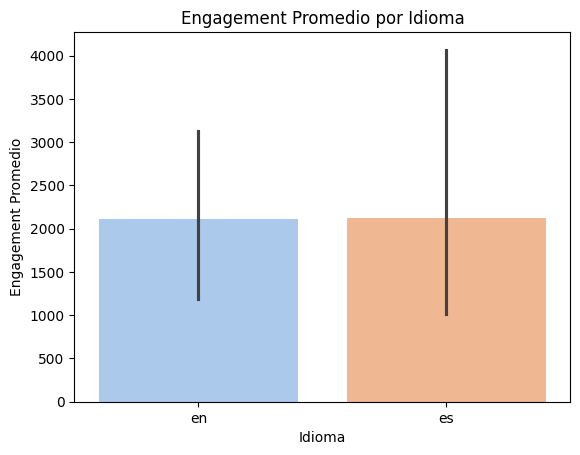

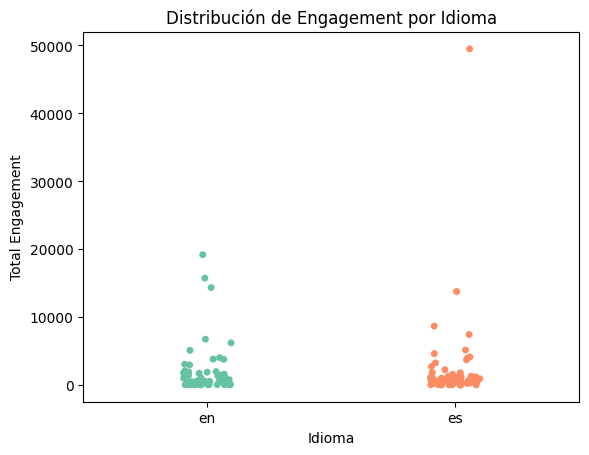

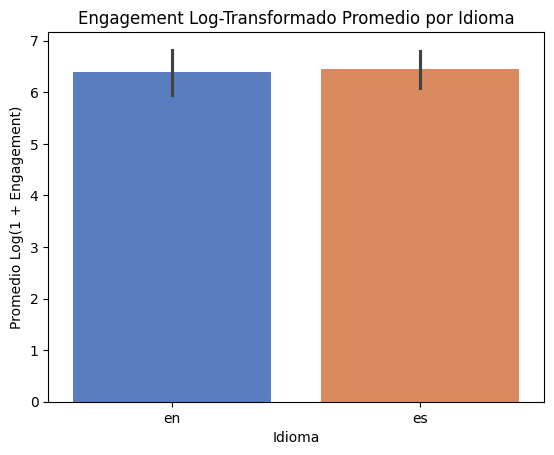

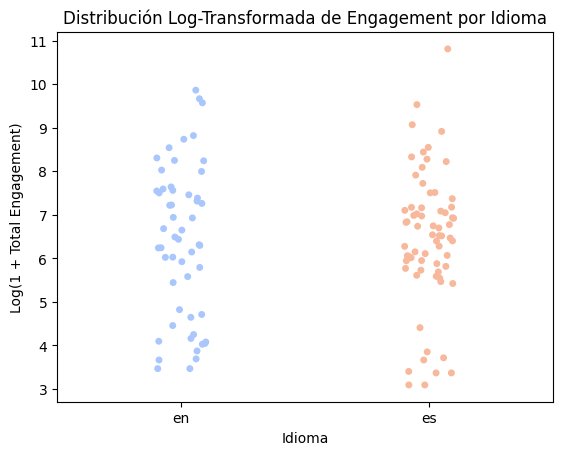

In [8]:
# -------------------------------------------
# SECCI√ìN C: COMPARACIONES BASADAS EN IDIOMA
# -------------------------------------------

# Gr√°fico de barras (Seaborn): Promedio de Total Engagement por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="pastel", legend=False)
    plt.title("Engagement Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Engagement Promedio")
    plt.show()

# Gr√°fico tipo strip: Distribuci√≥n bruta de engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="Set2", jitter=True, legend=False)
    plt.title("Distribuci√≥n de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Total Engagement")
    plt.show()

# -------------------------------------------
# NUEVO: Engagement Log-Transformado por Idioma
# -------------------------------------------

# Asegurarse de que la columna log-transformada existe
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])

# Gr√°fico de barras: Promedio de engagement log-transformado por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="muted", legend=False)
    plt.title("Engagement Log-Transformado Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Promedio Log(1 + Engagement)")
    plt.show()

# Gr√°fico tipo strip: Distribuci√≥n log-transformada del engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="coolwarm", jitter=True, legend=False)
    plt.title("Distribuci√≥n Log-Transformada de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Log(1 + Total Engagement)")
    plt.show()


### üåê **Tendencias de Engagement por Idioma**

#### üîπ **Engagement Promedio por Idioma (Bruto)**
- Los tweets en **ingl√©s (`en`) y espa√±ol (`es`) muestran un engagement promedio casi id√©ntico**, ambos ligeramente por encima de 2,000.
- Las **barras de error** son amplias, lo que indica una gran variabilidad ‚Äî especialmente en los tweets en espa√±ol, lo que sugiere tanto picos como m√≠nimos extremos.
- Esto implica que, aunque la visibilidad promedio es similar, **los tweets en espa√±ol pueden tener tanto casos de muy bajo como de alt√≠simo engagement**.

#### üîπ **Distribuci√≥n de Engagement por Idioma (Bruto)**
- El **gr√°fico de dispersi√≥n revela varios outliers extremos** ‚Äî un tweet en espa√±ol con casi **50,000 interacciones** destaca claramente.
- Los tweets en ingl√©s tambi√©n muestran algunos en el rango de 10k‚Äì20k, pero son menos extremos y menos frecuentes.
- En general, **los tweets en espa√±ol tienen una dispersi√≥n m√°s amplia**, lo que indica un engagement menos consistente y m√°s polarizado en comparaci√≥n con el ingl√©s.

#### üîπ **Engagement Promedio por Idioma (Escala Logar√≠tmica)**
- Tras aplicar una escala logar√≠tmica, ambos idiomas **convergen en t√©rminos de engagement promedio**, con barras casi id√©nticas alrededor de `log(1 + 6400) ‚âà 6.4`.
- La **transformaci√≥n logar√≠tmica aten√∫a los outliers**, permitiendo enfocarse en las tendencias generales m√°s que en las anomal√≠as virales.
- Esto sugiere que los niveles de engagement diarios son **consistente y comparables entre idiomas**, a pesar de las diferencias en escala bruta.

#### üîπ **Distribuci√≥n de Engagement Transformado por Idioma**
- La mayor√≠a de los tweets en ambos idiomas **se agrupan entre los valores logar√≠tmicos de 5 a 7**, lo que equivale a un engagement de aproximadamente ~150 a ~1,000.
- Los tweets en espa√±ol nuevamente muestran mayor variabilidad en los valores altos, con **varios superando log 9 (m√°s de 8,000 interacciones)**.
- El gr√°fico muestra que **el idioma no es un factor determinante fuerte del engagement**, aunque los **tweets en espa√±ol presentan m√°s potencial de viralidad**.

---

### ‚úÖ **An√°lisis**
> Las m√©tricas brutas muestran que los tweets en espa√±ol tienen extremos m√°s altos, mientras que los tweets en ingl√©s est√°n m√°s uniformemente distribuidos. Una vez transformados logar√≠tmicamente, ambos idiomas revelan un engagement promedio casi id√©ntico, lo que sugiere que **el alcance y la interacci√≥n del mensaje fueron igualmente efectivos en ambos grupos ling√º√≠sticos**, aunque los tweets en espa√±ol muestran mayor potencial viral.

### üü¶ SECCI√ìN D: Relaci√≥n entre caracter√≠sticas

Usamos un **scatter plot** y **gr√°fico de barras** para probar si hay relaci√≥n entre:

- **Tweet_Length** (eje x)
- **Compromiso_total** (eje y)

Ayuda a responder: *¬øLos tweets m√°s largos tienden a recibir m√°s atenci√≥n?*

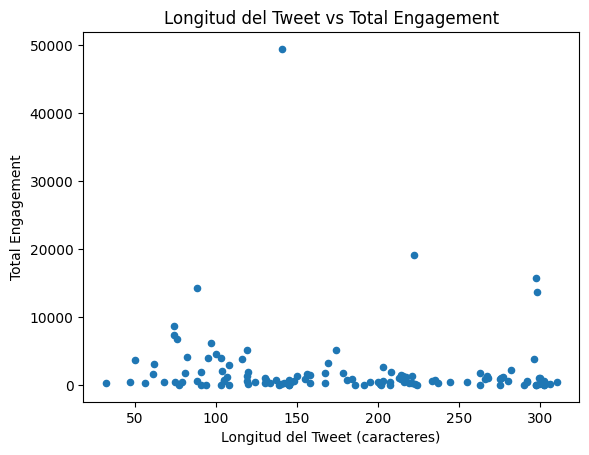

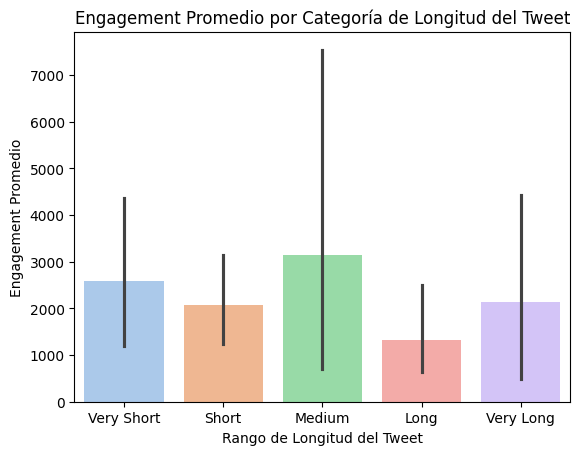

In [9]:
# -------------------------------------------
# SECCI√ìN D: RELACI√ìN ENTRE CARACTER√çSTICAS
# -------------------------------------------

# Gr√°fico de dispersi√≥n: Longitud del Tweet vs. Total Engagement
df_selected.plot(kind="scatter", x="Tweet_Length", y="Total_Engagement", title="Longitud del Tweet vs Total Engagement")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Total Engagement")
plt.show()

# Gr√°fico de barras: Promedio de Engagement por Categor√≠a de Longitud del Tweet
sns.barplot(x="Tweet_Length_Category", y="Total_Engagement", hue="Tweet_Length_Category", data=df_selected, palette="pastel", legend=False)
plt.title("Engagement Promedio por Categor√≠a de Longitud del Tweet")
plt.xlabel("Rango de Longitud del Tweet")
plt.ylabel("Engagement Promedio")
plt.show()

### ‚úçÔ∏è **Relaci√≥n Entre la Longitud del Tweet y el Engagement**

#### üîπ **Longitud del Tweet vs. Total Engagement (Gr√°fico de Dispersi√≥n)**
- El gr√°fico de dispersi√≥n muestra que **la mayor√≠a de los tweets se agrupan en niveles bajos de engagement**, independientemente de su longitud.
- Sin embargo, hay algunos **outliers con alto engagement** ‚Äî especialmente un tweet de aproximadamente **140 caracteres** que alcanz√≥ **casi 50,000 interacciones**.
- Se observan picos adicionales en el rango de 100 a 250 caracteres, lo que sugiere que los **tweets de longitud concisa a moderada** podr√≠an ser √≥ptimos para ganar tracci√≥n durante eventos urgentes.
- No existe una relaci√≥n lineal estricta, pero la dispersi√≥n indica que el **engagement no est√° limitado a tweets muy largos o muy cortos**.

#### üîπ **Engagement Promedio por Categor√≠a de Longitud de Tweet (Gr√°fico de Barras)**
- Los tweets se agrupan en categor√≠as como *Muy Corto*, *Corto*, *Medio*, *Largo* y *Muy Largo*.
- Los **tweets de longitud media** (probablemente entre 100 y 160 caracteres) muestran el **engagement promedio m√°s alto**, aunque las barras de error son amplias, reflejando variabilidad.
- Los tweets **Muy Cortos** y **Muy Largos** tambi√©n tienen un desempe√±o razonable, posiblemente por ser **alertas r√°pidas** o **avisos detallados**.
- Los **tweets largos (cerca del l√≠mite de caracteres)** tienen el engagement promedio m√°s bajo, posiblemente debido a menor claridad o legibilidad durante momentos de alta urgencia.

---

### ‚úÖ **An√°lisis**
> El engagement tiende a alcanzar su punto m√°ximo en **tweets de longitud media**, lo que puede representar un buen equilibrio entre ser **conciso e informativo**. Los tweets extremadamente cortos o largos tambi√©n pueden funcionar bien seg√∫n el contexto ‚Äî como **alertas breves** o **avisos detallados**. Sin embargo, **la longitud del tweet por s√≠ sola no predice consistentemente el engagement**; la claridad del contenido y el momento de publicaci√≥n probablemente juegan un papel m√°s importante.

### üü¶ SECCI√ìN E: Matriz de correlaci√≥n

Este mapa de calor muestra el **coeficiente de correlaci√≥n** entre:

- `Total_Engagement`
- `Tweet_Length`

Los valores de correlaci√≥n oscilan entre:
- **+1** = fuertemente positivo
- **0** = sin correlaci√≥n
- **-1** = fuertemente negativo

Esto confirma o cuestiona lo que vimos en el gr√°fico de dispersi√≥n.

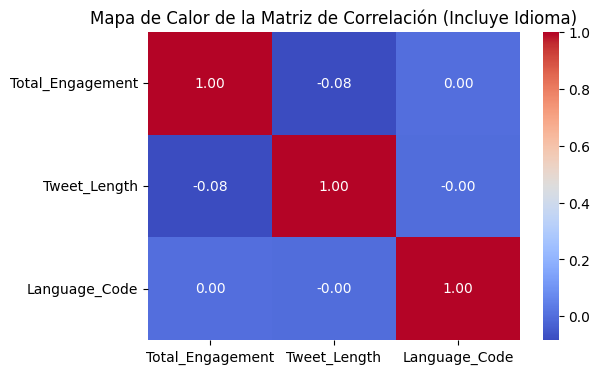

In [10]:
# -------------------------------------------
# SECCI√ìN E: MATRIZ DE CORRELACI√ìN
# -------------------------------------------

# Mapa de calor: Correlaci√≥n entre variables num√©ricas

# Convertir idioma a c√≥digos num√©ricos para incluir en la correlaci√≥n
df_selected["Language_Code"] = df_selected["Language"].map({"en": 0, "es": 1})

# Matriz de correlaci√≥n incluyendo el c√≥digo del idioma
corr_matrix = df_selected[["Total_Engagement", "Tweet_Length", "Language_Code"]].corr()

# Mapa de calor de la matriz de correlaci√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de la Matriz de Correlaci√≥n (Incluye Idioma)")
plt.show()


### üîó **An√°lisis de la Matriz de Correlaci√≥n**

Esta matriz explora las relaciones entre:
- **Total Engagement**
- **Longitud del Tweet**
- **C√≥digo de Idioma** (`en` = 0, `es` = 1)

#### üîπ **Total Engagement vs. Longitud del Tweet**
- Correlaci√≥n: **-0.08**
- Se trata de una **correlaci√≥n negativa muy d√©bil**, lo que sugiere que a medida que aumenta la longitud del tweet, el engagement total **disminuye ligeramente**, aunque la relaci√≥n no es estad√≠sticamente significativa.
- En t√©rminos pr√°cticos, la longitud del tweet **no influye de manera importante** en el nivel de engagement.

#### üîπ **Total Engagement vs. Idioma**
- Correlaci√≥n: **0.00**
- No existe correlaci√≥n entre el idioma y el engagement total.
- Esto confirma hallazgos previos: **los tweets en ingl√©s y en espa√±ol tienen un rendimiento similar en promedio**, y el idioma por s√≠ solo **no impulsa el engagement**.

#### üîπ **Longitud del Tweet vs. Idioma**
- Correlaci√≥n: **~0.00**
- Nuevamente, no hay relaci√≥n significativa. Los tweets en ingl√©s y en espa√±ol son **similares en longitud**, sin una tendencia clara hacia formatos m√°s largos o m√°s cortos seg√∫n el idioma.

---

### ‚úÖ **An√°lisis**
> El heatmap de correlaci√≥n revela que **ninguna de las variables analizadas (longitud o idioma)** tiene una influencia directa significativa sobre el engagement de los tweets. Esto respalda los hallazgos anteriores de que **el contexto, el momento de publicaci√≥n y el contenido** son factores mucho m√°s determinantes en la respuesta del p√∫blico que atributos estructurales como la longitud o el idioma.

### üü¶ SECCI√ìN F: Visualizaciones Interactivas con Plotly

Esta secci√≥n recrea visualizaciones clave utilizando **Plotly** para ofrecer mayor interactividad y profundidad de an√°lisis. Estos gr√°ficos permiten:

- üîç **Hacer zoom y desplazarse** para inspeccionar picos de engagement a lo largo del tiempo  
- üñ±Ô∏è **Ver tooltips al pasar el cursor** para explorar datos con precisi√≥n  
- üìä **Comparaciones lado a lado** entre el engagement bruto y el transformado (log)
- üí° √ötil para presentaciones, paneles interactivos y an√°lisis detallado del comportamiento de engagement

In [11]:
# -------------------------------------------
# SECCI√ìN F: VISUALIZACIONES INTERACTIVAS CON PLOTLY
# -------------------------------------------

import plotly.express as px
import plotly.graph_objects as go

# Gr√°fico de l√≠nea interactivo: Total Engagement a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Total_Engagement",
    title="üïí Total Engagement a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Total_Engagement": "Total Engagement"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Total Engagement")
fig.show()

# Gr√°fico de l√≠nea interactivo: Total Engagement log-transformado a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Log_Total_Engagement",
    title="üïí Total Engagement Log-Transformado a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Log_Total_Engagement": "Log(1 + Engagement)"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Log(1 + Total Engagement)")
fig.show()

# Histograma interactivo: Distribuci√≥n de Total Engagement
fig = px.histogram(
    df_selected,
    x="Total_Engagement",
    nbins=30,
    title="üìä Distribuci√≥n de Total Engagement (Interactivo)",
    labels={"Total_Engagement": "Total Engagement"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

# Histograma interactivo: Distribuci√≥n de Total Engagement log-transformado
fig = px.histogram(
    df_selected,
    x="Log_Total_Engagement",
    nbins=30,
    title="üìä Distribuci√≥n Log-Transformada de Total Engagement (Interactivo)",
    labels={"Log_Total_Engagement": "Log(1 + Engagement)"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

## ‚òÅÔ∏è Nube de Palabras: T√©rminos Frecuentes en Tweets

Esta Nube de Palabras muestra las **palabras m√°s comunes** en todos los tweets.

- Las **palabras m√°s grandes** = mayor frecuencia de uso.  
- √ötil para identificar **temas en tendencia** o t√©rminos clave.  
- Se eliminaron las **stopwords** comunes (en ingl√©s y espa√±ol) y el ruido t√≠pico de Twitter (como `RT`, `https`) para mayor claridad.

> Un resumen visual r√°pido del contenido de los tweets en ambos idiomas.

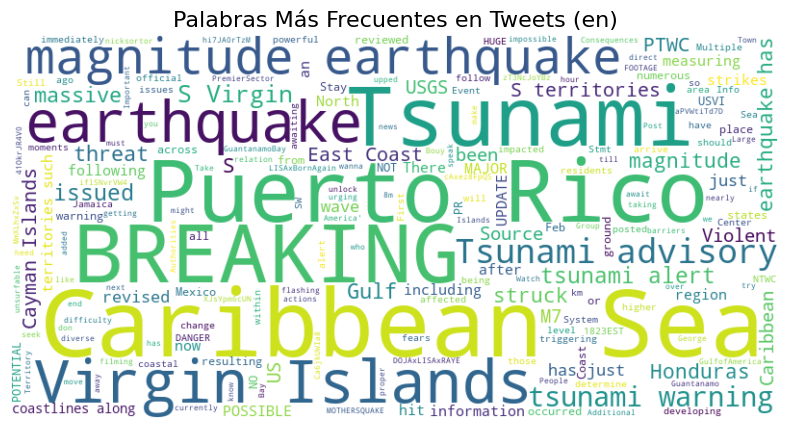

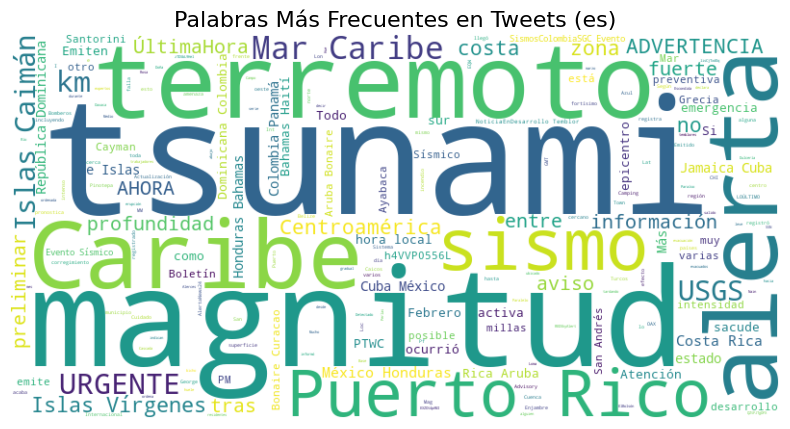

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Definir conjunto reutilizable de stopwords (palabras vac√≠as)
custom_stopwords = {
    "https", "RT", "co", "amp",
    "de", "a", "t", "el", "que", "se", "la", "en", "por",
    "los", "las", "del", "al", "un", "una", "con", "para",
    "este", "esta", "estos", "estas", "ese", "esa", "esos", "esas",
    "y", "o", "u", "pero", "su", "sus", "porque", "son",
    "ser", "sido", "ha", "han", "hay", "qu√©", "etc", "PuertoRico",
    "the", "is", "to", "of", "and", "in", "for", "on", "at", "with", "as", "this", "that", "it", "are",
}

# Funci√≥n para generar y mostrar una nube de palabras seg√∫n el idioma
def generate_wordcloud_for_language(language_code):
    text = " ".join(
        df_selected[df_selected["Language"] == language_code]["Tweet_Content"].dropna().astype(str)
    )
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200,
        stopwords=custom_stopwords
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Palabras M√°s Frecuentes en Tweets ({language_code})", fontsize=16)
    plt.show()

# Generar nubes de palabras para ingl√©s y espa√±ol
generate_wordcloud_for_language("en")
generate_wordcloud_for_language("es")


### üåê **T√©rminos Principales en Tweets por Idioma**

#### üîπ **Nube de Palabras en Ingl√©s (`en`)**
- **T√©rminos m√°s destacados**:  
  `BREAKING`, `Tsunami`, `Caribbean Sea`, `Puerto Rico`, `Virgin Islands`, `earthquake`, `magnitude`
- El lenguaje refleja un tono de **urgencia y estilo noticioso**, con √©nfasis en:
  - **Enfoque geogr√°fico**: `Caribbean`, `Puerto Rico`, `Virgin Islands`, `Cayman Islands`, etc.
  - **T√©rminos relacionados con el evento**: `Tsunami`, `earthquake`, `warning`, `advisory`, `USGS`
  - **Enmarcado comunicacional**: Palabras como `BREAKING`, `UPDATE` y `POTENTIAL` sugieren un formato de **alerta noticiosa o actualizaci√≥n en tiempo real**.
- Esto sugiere que los tweets en ingl√©s se utilizaron principalmente para **noticias de √∫ltima hora, alertas y comunicados oficiales**, probablemente dirigidos tanto a audiencias internacionales como regionales.

#### üîπ **Nube de Palabras en Espa√±ol (`es`)**
- **T√©rminos m√°s destacados**:  
  `tsunami`, `terremoto`, `magnitud`, `alerta`, `Puerto Rico`, `Caribe`, `sismo`, `URGENTE`
- El tono dominante es de **emergencia y precisi√≥n**, con:
  - Fuerte enfoque **cient√≠fico/informativo**: `magnitud`, `USGS`, `profundidad`, `km`, `preliminar`
  - Lenguaje orientado a **alertas**: `alerta`, `URGENTE`, `advertencia`, `aviso`
  - T√©rminos geogr√°ficos comunes en la regi√≥n, como `Islas Caim√°n`, `Centroam√©rica`, `Costa Rica`, etc.
- Los tweets en espa√±ol parecen centrarse en **datos s√≠smicos detallados y alertas de seguridad p√∫blica**, dirigidos a usuarios regionales en busca de actualizaciones urgentes y locales.

---

### ‚úÖ **An√°lisis**
> Aunque tanto los tweets en ingl√©s como en espa√±ol giran en torno a la **emergencia por terremoto y tsunami**, sus vocabularios reflejan distintos estilos de comunicaci√≥n. Los tweets en ingl√©s tienden a destacar la **noticiabilidad y la urgencia**, mientras que los tweets en espa√±ol enfatizan la **informaci√≥n t√©cnica y las alertas localizadas**. En conjunto, muestran un flujo biling√ºe de comunicaci√≥n p√∫blica durante el evento s√≠smico del 9 de febrero.

## Conclusi√≥n

Este an√°lisis proporcion√≥ una visi√≥n integral del conjunto de datos `PR_Advisory_Tweets_Feb_2025.csv`, enfocado en el engagement de los tweets, las caracter√≠sticas del contenido y los patrones ling√º√≠sticos. A trav√©s de una limpieza de datos sistem√°tica, la creaci√≥n de nuevas variables y una variedad de t√©cnicas de exploraci√≥n visual, se obtuvieron insights sobre:

- La distribuci√≥n y estructura del contenido de los tweets  
- Tendencias temporales en la actividad y el engagement  
- Diferencias de engagement seg√∫n el idioma  
- Temas comunes expresados por los usuarios a trav√©s de la frecuencia de palabras  

Se utilizaron diversas herramientas de visualizaci√≥n‚Äîtanto est√°ticas como interactivas‚Äîpara mejorar la interpretaci√≥n y descubrir patrones en los datos. Este enfoque demuestra c√≥mo el ecosistema de ciencia de datos en Python puede aplicarse de forma eficaz al an√°lisis de redes sociales, especialmente en el contexto de eventos en tiempo real como desastres naturales.